In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

In [0]:
# !pip install datadotworld
# !pip install datadotworld[pandas]

In [0]:
# !dw configure

In [0]:
import datadotworld as dw


In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
# drive.mount('/content/drive')

In [5]:
ls

drive/  sample_data/


In [6]:
cd drive

/content/drive


In [10]:
cd Colab\ Notebooks/Matrix_DW

/content/drive/My Drive/Colab Notebooks/Matrix_DW


In [13]:
cd ..

/content/drive/My Drive/Colab Notebooks/Matrix_DW


In [0]:
!mkdir data

In [15]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
!echo 'data' > .gitignore

In [0]:
!git add .gitignore

In [20]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')
data

LocalDataset('/root/.dw/cache/datafiniti/mens-shoe-prices/latest/datapackage.json')

In [23]:
df = data.dataframes['7004_1']
df.shape

(19387, 48)

In [25]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
16958,AVpfeqwA1cnluZ0-ldGr,NaN,Ralph Lauren,"Men,Dress,Shoes",Black,NaN,2015-08-18T16:43:06Z,2016-02-25T20:53:54Z,NaN,NaN,NaN,NaN,NaN,http://www.ralphlauren.com/graphics/product_im...,NaN,"ralphlauren/68448976,marlowcalfskintasselloafe...",NaN,68448976,"[{""address"":""650 Madison Ave C1"",""availability...",Marlow Calfskin Tassel Loafer,895.00,895.00,NaN,Black,New,NaN,USD,2015-08-18T16:43:06Z,2015-08-11T00:00:00Z,NaN,false,www.ralphlauren.com,NaN,The full amount will be credited to the origin...,FREE SHIPPING ON ORDERS OVER $125. $5 FLAT-RAT...,9 EE,NaN,http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ralphlauren.com/pr...",http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,NaN
16363,AVpfWAxbLJeJML437fuZ,NaN,New Balance,"Clothing,Shoes,Men's Shoes,All Men's Shoes",Black,NaN,2016-06-08T05:31:12Z,2016-11-15T13:19:15Z,"[{""dateSeen"":[""2016-08-04T04:05:19Z""],""sourceU...",NaN,8.876870e+11,"[{""key"":""Sport"",""value"":[""Casual Shoes""]},{""ke...",NaN,https://i5.walmartimages.com/asr/19d1ff8a-4264...,NaN,"887687045971,0887687045971,newbalance/mw840bk2...",New Balance,MW840BK_2E,"[{""dateSeen"":[""2016-06-08T05:31:12Z""],""name"":""...",New Balance Men's 840 Wide 2e Training Shoe,77.47,77.47,NaN,NaN,new,NaN,USD,2016-11-15T13:19:15Z,2016-10-31T00:00:00Z,NaN,false,shoezoo - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/48808964,NaN,NaN,NaN,NaN,NaN,"http://www.walmart.com/ip/48809012,https://www...",887687045988,NaN,NaN,NaN
13236,AVpfvimeLJeJML43C6xO,NaN,Nike,"Sporting Goods,Team Sports,Football,Clothing, ...",Black,NaN,2016-06-20T14:18:27Z,2016-06-20T14:18:27Z,"[{""dateSeen"":[""2016-06-20T14:18:27Z""],""sourceU...",NaN,8.834195e+11,"[{""key"":""Sport"",""value"":[""Football""]},{""key"":""...",NaN,http://i.ebayimg.com/images/g/2TwAAOSwzgRWy30S...,NaN,"0883419492334,newnike442258011zoomcodedblackwh...",NaN,NaN,"[{""dateSeen"":[""2016-06-18T00:00:00Z""],""name"":""...",New Nike 442258 011 Zoom Code D Black / White ...,37.46,37.46,NaN,NaN,New with box,NaN,USD,2016-06-20T14:18:27Z,2016-06-18T00:00:00Z,NaN,true,topbranditemstopbranditems - Ebay.com,NaN,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/New-Nike-442258-011-Zo...,NaN,NaN,NaN,14,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-N...",http://www.ebay.com/itm/New-Nike-442258-011-Zo...,883419492334,NaN,NaN,NaN
13578,AVpfcYdl1cnluZ0-k2jm,NaN,Wishpets,"Baby & Toddler Shoes,Baby & Kids Shoes,Men's S...",NaN,NaN,2016-11-11T09:22:34Z,2016-11-11T09:22:34Z,"[{""dateSeen"":[""2016-11-11T09:22:34Z""],""sourceU...",NaN,6.373516e+11,"[{""key"":""Shoe Size"",""value"":[""M - Kids/Adult""]...",NaN,http://i5.walmartimages.com/dfw/dce07b8c-e140/...,NaN,"wishpets/55333,0637351553338,637351553338",Wishpets,55333,"[{""dateSeen"":[""2016-11-11T09:22:34Z""],""name"":""...",Wishpets Green Camo Dinosaur Claw Slippers Fun...,25.12,25.12,NaN,NaN,new,NaN,USD,2016-11-11T09:22:34Z,2015-11-03T00:00:00Z,NaN,false,Hobby Warehouse - Walmart.com,REDUCEDUSD 4.19,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Wishpets-Green-Camo-...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Wishpets-Green-Camo...,637351553338,NaN,NaN,NaN
16417,AVpffIky1cnluZ0-llSP,NaN,Darn Tough,"Clothing, Shoes & Accessories,See more Men's 1...","Gray ,Charcoal,Oatmeal",NaN,2017-01-09T19:48:56Z,2017-01-09T19:48:56Z,"[{""dateSeen"":[""2016-06-08T03:18:16Z""],""sourceU...",NaN,6.422491e+11,"[{""key"":""Country of Origin - Assembly"",""value""...",NaN

In [26]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [34]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [35]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
PalmBeach Jewelry - Walmart.com                           3
New with box                                              3
Wholesale Costume and Party Supplies - Walmart.com        2
SHOEBACCA LTD. - Walmart.com                              1
Shoes.com                                                 1
New without tags                                          1
Name: prices_currency, dtype: int64

In [36]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
UnbeatableSale.com, Inc. - Walmart.com                0.000155
new                                                   0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
New with box                                          0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
SHOEBACCA LTD. - Walmart.com                          0.000052
Shoes.com                                             0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

In [39]:
df_usd = df[df.prices_currency == 'USD'].copy() # df.prices_currency == 'USD' dziala jak filtr, ktory mowi wybierz z kolumny 'prices_currency' wartości 'USD' (copy odpowiada za optymalizacje zeby nie pracowac na tym samym zbiorze wejsciowym)
df_usd.shape

(18524, 48)

In [47]:
df_usd.prices_amountmin.head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: float64

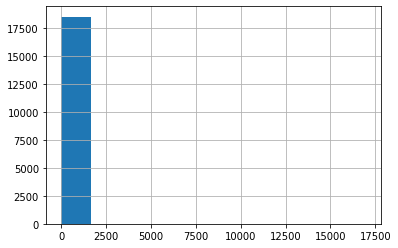

In [43]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float) # doadanie astype spowoduje ze dtype zmieni sie na float
df_usd['prices_amountmin'].hist()

In [49]:
max_price_filter = np.percentile(df_usd['prices_amountmin'], 99) # to oznacza ze buty w 99% przypadkow i mniej kosztują 895 dolarow
max_price_filter

895.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f08819908>,
      dtype=object)

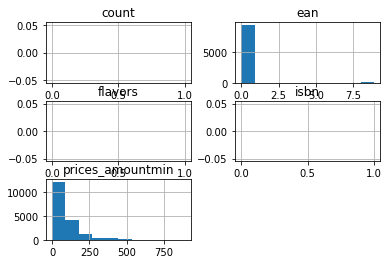

In [50]:
df_usd_filter = df_usd[df_usd['prices_amountmin'] < max_price_filter] # w nawiasach klamrowyh wyrazneie dziala jak filtr (powyżej podobny przyklad byl)


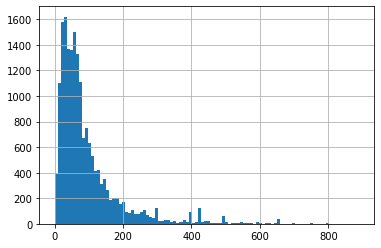

In [68]:
df_usd_filter.prices_amountmin.hist(bins=100)
#na osi X cena butow, na osi Y liczba, bins onacza rozbicie (steps - co ile)
#wykres jest przewidywalny - ma format dlugiego ogonu

In [79]:
cd /content/drive/My Drive/Colab Notebooks/Matrix_DW/data

/content/drive/My Drive/Colab Notebooks/Matrix_DW/data


In [81]:
cd ..

/content/drive/My Drive/Colab Notebooks/Matrix_DW


In [82]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [0]:
df.to_csv('data/shoes_prices.csv', index=False)

In [86]:
ls

shoes_prices.csv


In [87]:
cd ..

/content/drive/My Drive/Colab Notebooks/Matrix_DW


In [0]:
!git add matrix_one/day3.ipynb

In [0]:
! git commit -m "Readed Men's Shoe Prices dataset from data.world"